<a href="https://colab.research.google.com/github/MoazzemhossainMoazz/EDGE_AI/blob/main/Mid_exam2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost
from xgboost import XGBClassifier

In [ ]:
heart_data = pd.read_csv('/content/Heart Attack.csv')

In [ ]:
#print firtst 5 rows of the dataset
heart_data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [ ]:
#print last 5 rows of the dataset
heart_data.tail()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive
1318,51,1,94,157,79,134.0,50.89,1.770,positive


In [ ]:
#number of rows and column in the dataset
heart_data.shape

(1319, 9)

In [ ]:
#getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [ ]:
#checking for missing values
heart_data.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [ ]:
print(f"There are{heart_data.duplicated().sum()} duplicates data")
heart_data.loc[heart_data.duplicated(keep=False)].sort_values(by=heart_data.columns.to_list())

There are0 duplicates data


,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class


In [ ]:
heart_data.drop_duplicates(inplace=True)

In [ ]:
print(f"There are{heart_data.duplicated().sum()} duplicates data")
heart_data.loc[heart_data.duplicated(keep=False)].sort_values(by=heart_data.columns.to_list())

There are0 duplicates data


,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class


In [ ]:
#statistical measures about the data
heart_data.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


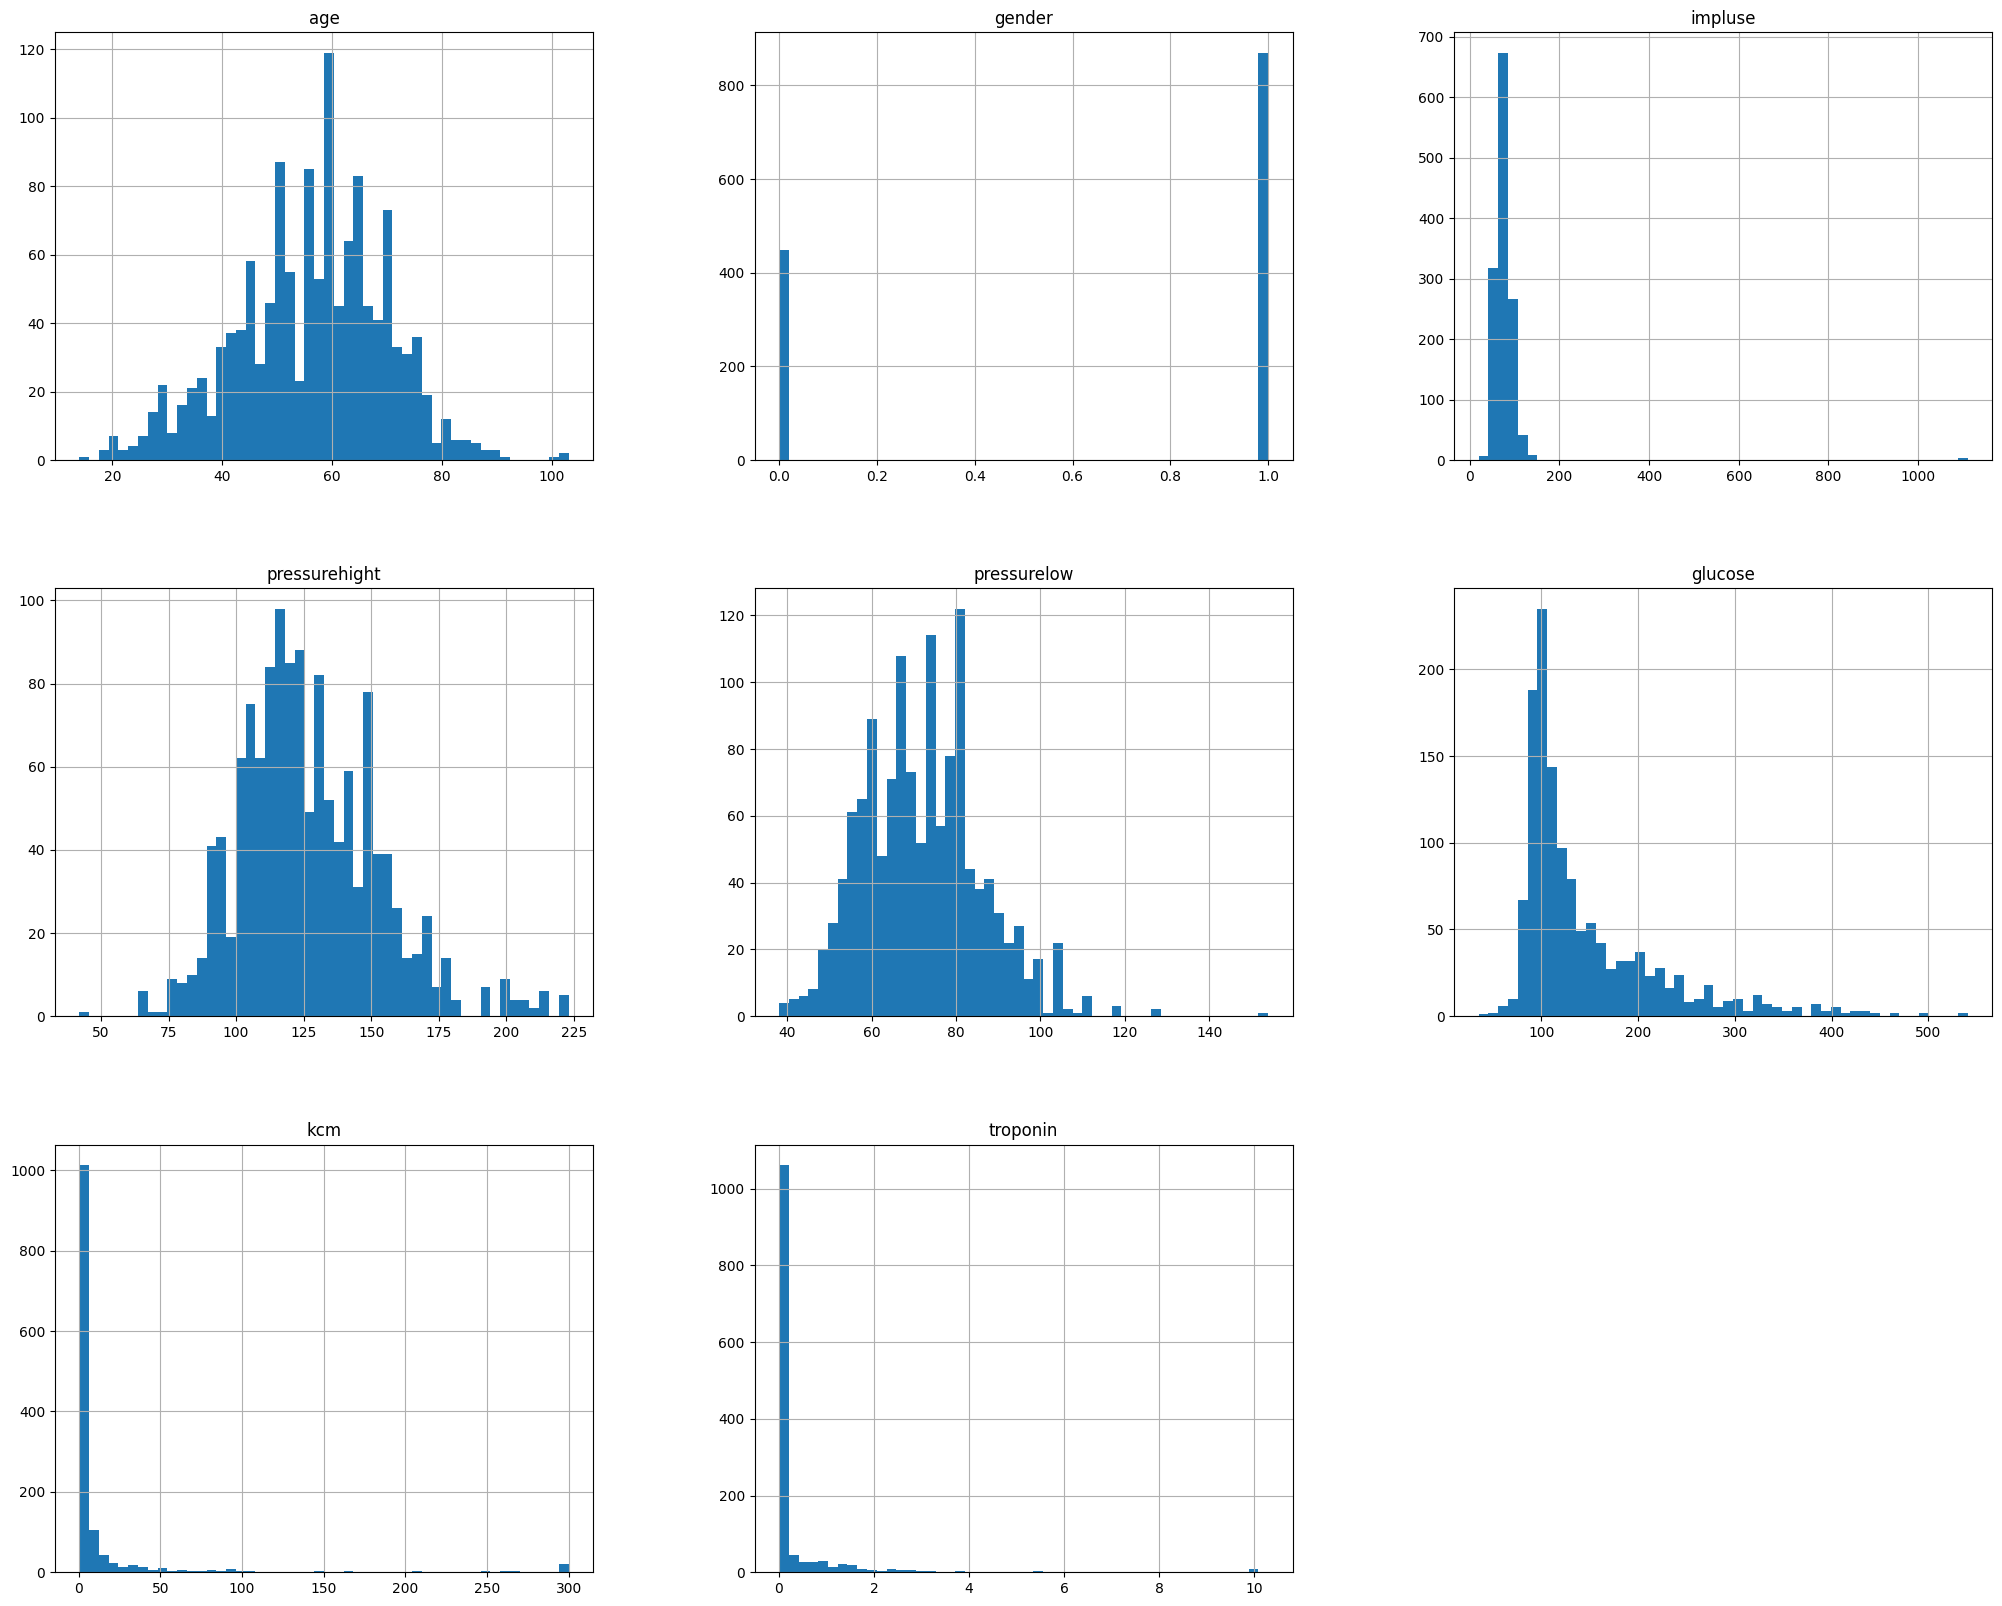

In [ ]:
heart_data.hist(bins=50, figsize=(25, 20))
plt.show()

<ipython-input-19-93529713b1fe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(heart_data.corr(), annot=True)


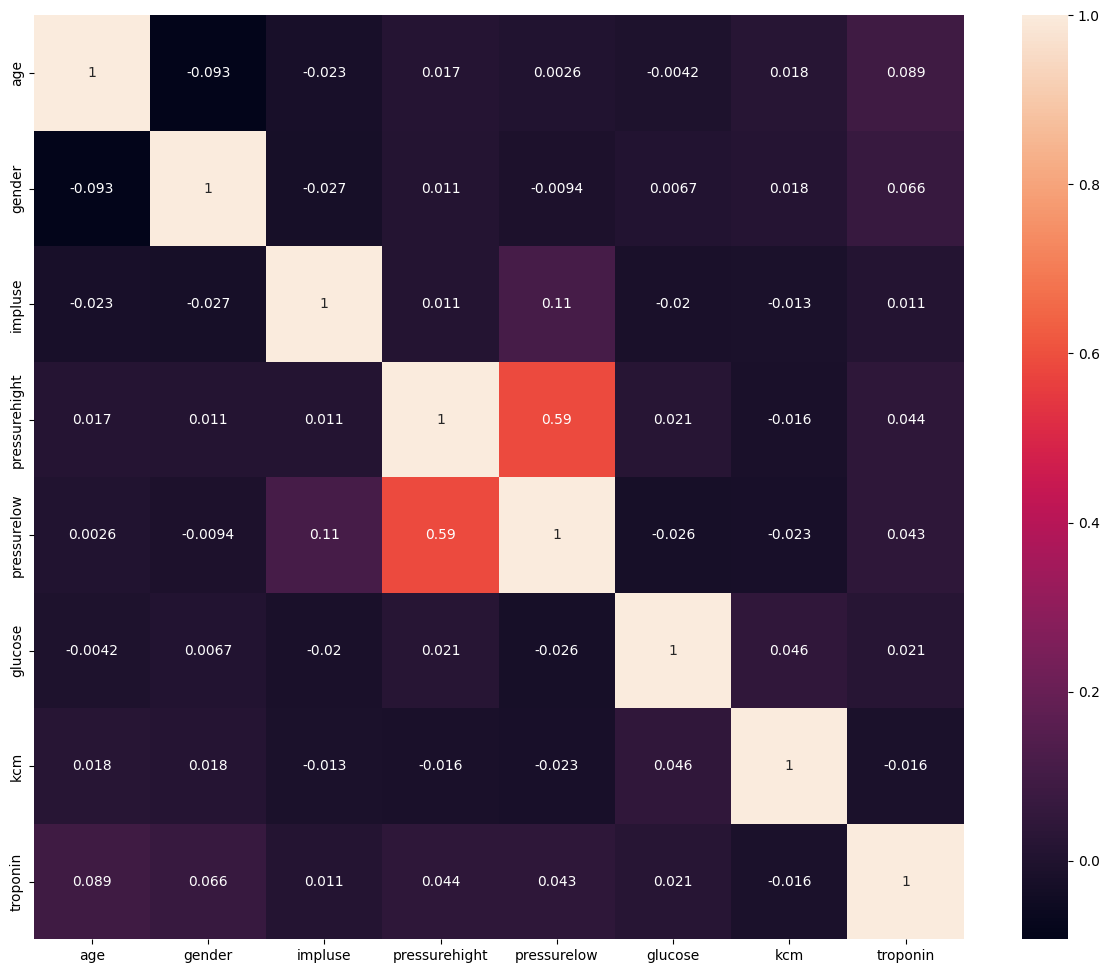

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(heart_data.corr(), annot=True)
plt.show()

In [ ]:
correlation_matrix = heart_data.corr(method='pearson')
correlation_matrix

<ipython-input-20-1091e296e6e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = heart_data.corr(method='pearson')


,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
age,1.000000,-0.092874,-0.023440,0.017441,0.002614,-0.004193,0.018419,0.088800
gender,-0.092874,1.000000,-0.026781,0.011065,-0.009370,0.006668,0.017527,0.065793
impluse,-0.023440,-0.026781,1.000000,0.010882,0.108353,-0.019584,-0.013001,0.011180
pressurehight,0.017441,0.011065,0.010882,1.000000,0.586166,0.020807,-0.016396,0.043729
pressurelow,0.002614,-0.009370,0.108353,0.586166,1.000000,-0.025614,-0.023403,0.043360
glucose,-0.004193,0.006668,-0.019584,0.020807,-0.025614,1.000000,0.045757,0.021069
kcm,0.018419,0.017527,-0.013001,-0.016396,-0.023403,0.045757,1.000000,-0.016008
troponin,0.088800,0.065793,0.011180,0.043729,0.043360,0.021069,-0.016008,1.000000


In [ ]:
#checking the distribution of target variable
heart_data['heart disease'].value_counts()

KeyError: ignored

In [ ]:
pip install featurewiz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 9.6 MB/s eta 0:00:00
  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2436 sha256=b1b7349d1ad86bff686c5e0accb51dee2a319dee0db08a6e1cddf2cc7e442bd9
  Stored in directory: /root/.cache/pip/wheels/a6/ff/5d/4f10de26fe5ddef243c97f13c6cf579d7353d659e41a05c3a6
Successfully built feather-format


In [ ]:
from featurewiz import featurewiz

In [ ]:
target = 'heart disease'
features= featurewiz(heart_data, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [ ]:
x = heart_data.drop(columns='heart disease', axis=1)
y = heart_data['heart disease']

In [ ]:
print(x)

In [ ]:
print(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

In [ ]:
#Random forest
rf1 = RandomForestClassifier()
rf1.fit(x_train, y_train.ravel())
predictions = rf1.predict(x_test)

print(classification_report(y_test, predictions))
#import result of mse
print("mse=", metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=", metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
#Decison Tree
DT1 = DecisionTreeClassifier()
DT1.fit(x_train, y_train.ravel())
predictions1 = DT1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions1))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions1))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions1))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions1))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions1)))

In [ ]:
# XGB classifier machine object
XGB1 = XGBClassifier()
# train the model on train set
XGB1.fit(x_train, y_train.ravel())
predictions2 = XGB1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions2))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions2))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions2))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions2))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

In [ ]:
# KNN classifier machine object
KNN1 =  KNeighborsClassifier()
# train the model on train set
KNN1.fit(x_train, y_train.ravel())
predictions3 = KNN1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions3))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions3))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions3))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions3))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions3)))

In [ ]:
# support vector machine object
svm1 = SVC(kernel='linear')
# train the model on train set
svm1.fit(x_train, y_train.ravel())
predictions4 = svm1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions4))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions4))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions4))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions4))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions4)))

In [ ]:
pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
sm_over = SMOTE(random_state=2)

In [ ]:
x_train_res, y_train_res = sm_over.fit_resample(x_train, y_train.ravel())

In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))



print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train== 0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

In [ ]:
#Random Forest
rf = RandomForestClassifier(random_state=100)
rf.fit(x_train_res, y_train_res.ravel())
predictions = rf.predict(x_test)
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
#Decison Tree
DT = DecisionTreeClassifier()
DT.fit(x_train_res, y_train_res.ravel())
predictions1 = DT.predict(x_test)
# print classification report
print(classification_report(y_test, predictions1))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions1))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions1))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions1))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions1)))


In [ ]:
# XGB classifier machine object
XGB = XGBClassifier()
# train the model on train set
XGB.fit(x_train_res, y_train_res.ravel())
predictions2 = XGB.predict(x_test)
# print classification report
print(classification_report(y_test, predictions2))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions2))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions2))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions2))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

In [ ]:
# KNN classifier machine object
KNN =  KNeighborsClassifier()
# train the model on train set
KNN.fit(x_train_res, y_train_res.ravel())
predictions3 = KNN.predict(x_test)
# print classification report
print(classification_report(y_test, predictions3))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions3))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions3))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions3))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions3)))


In [ ]:
# support vector machine object
svm = SVC(kernel='linear')
# train the model on train set
svm.fit(x_train_res, y_train_res.ravel())
predictions4 = svm.predict(x_test)
# print classification report
print(classification_report(y_test, predictions4))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions4))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions4))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions4))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions4)))

In [ ]:
#apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()

x_train_miss, y_train_miss = nr.fit_resample(x_train, y_train.ravel())

In [ ]:
#Near miss result
print('After undersampling, the shape of train_X: {}'.format(x_train_miss.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_miss.shape))


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {}".format(sum(y_train == 0)))
print("After UnderSampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

In [ ]:
#Random Forest
rf2 = RandomForestClassifier(random_state=100)
rf2.fit(x_train_miss, y_train_miss.ravel())
predictions = rf2.predict(x_test)
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
#Decison Tree
DT2 = DecisionTreeClassifier()
DT2.fit(x_train_miss, y_train_miss.ravel())
predictions1 = DT2.predict(x_test)
# print classification report
print(classification_report(y_test, predictions1))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions1))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions1))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions1))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions1)))

In [ ]:
# XGB classifier machine object
XGB2 = XGBClassifier()
# train the model on train set
XGB2.fit(x_train_miss, y_train_miss.ravel())
predictions2 = XGB2.predict(x_test)
# print classification report
print(classification_report(y_test, predictions2))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions2))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions2))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions2))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

In [ ]:
# KNN classifier machine object
KNN2 =  KNeighborsClassifier()
# train the model on train set
KNN2.fit(x_train_miss, y_train_miss.ravel())
predictions3 = KNN2.predict(x_test)
# print classification report
print(classification_report(y_test, predictions3))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions3))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions3))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions3))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions3)))

In [ ]:
# support vector machine object
svm2 = SVC(kernel='linear')
# train the model on train set
svm2.fit(x_train_miss, y_train_miss.ravel())
predictions4 = svm2.predict(x_test)
# print classification report
print(classification_report(y_test, predictions4))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions4))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions4))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions4))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions4)))

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [ ]:
y = y_test
yhat = predictions4
x = list(range(len(y)))

plt.scatter(x, y, color="blue", label="original")
plt.plot(x, yhat, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

#change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

#reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = svm.predict(input_data_reshaped)
print(prediction)

if(prediction[0]== 0):
  print('The person does not have a heart disease')
else:
  print('The person has heart disease')

In [ ]:
import pickle

filename= 'heart_disease_model.sav'
pickle.dump(XGB1, open(filename, 'wb'))

#loding the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

